In [20]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
data_dir = pjoin(dirname(sio.__file__), 'matlab', 'tests', 'data')
print(data_dir)
mat_fname = pjoin(data_dir, 'dataset.mat')

/Users/hungweicheng/opt/anaconda3/envs/ck3/lib/python3.7/site-packages/scipy/io/matlab/tests/data


In [3]:
mat_contents = sio.loadmat('dataset.mat')
sorted(mat_contents.keys())

['D', 'X', '__globals__', '__header__', '__version__']

In [95]:
D = mat_contents['D']
print(D.shape)
d1 = np.array([D[i] for i in range(len(D))])
# print(len(D))

(100, 1)


In [92]:
X = mat_contents['X']
x1 = np.array([X[i][1] for i in range(len(X))])
x2 = np.array([X[i][2] for i in range(len(X))])
print(X)
# print(x2)

[[ 1.00000000e+00 -9.47246644e-01 -5.65462712e-01]
 [ 1.00000000e+00  5.40149747e-01  2.08619702e-01]
 [ 1.00000000e+00 -2.16602141e-01 -2.05030149e+00]
 [ 1.00000000e+00  1.18903197e+00  2.04857822e+00]
 [ 1.00000000e+00  1.31698783e+00 -3.17208298e-01]
 [ 1.00000000e+00 -4.05628870e-01 -1.16091464e+00]
 [ 1.00000000e+00 -4.44906311e-01 -1.10291231e-01]
 [ 1.00000000e+00  1.32838582e+00  2.27516290e+00]
 [ 1.00000000e+00  8.33802589e-01  1.32412519e+00]
 [ 1.00000000e+00  6.04446392e-01 -9.49736504e-01]
 [ 1.00000000e+00 -1.06671546e-01 -4.68779829e-01]
 [ 1.00000000e+00  3.01532940e-03 -1.23480383e+00]
 [ 1.00000000e+00  4.57111658e-01  6.86419672e-01]
 [ 1.00000000e+00  9.21720899e-01  9.28292474e-01]
 [ 1.00000000e+00 -1.97341696e-01  9.14083515e-01]
 [ 1.00000000e+00  7.55034885e-02  1.17464065e+00]
 [ 1.00000000e+00  8.88692003e-03  3.91198845e-01]
 [ 1.00000000e+00  8.38831099e-01  2.61893749e-01]
 [ 1.00000000e+00 -5.42412762e-01 -1.13040247e+00]
 [ 1.00000000e+00  5.67566470e-

### Xt = np.transpose(X)


In [7]:
#5.1
# W = (Xt*X)^(-1)*Xt*D
w1 = np.dot(Xt, X)
w2 = np.dot(Xt, D)
W = np.dot(inv(w1), w2)

print(W)

[[ 1.0006781 ]
 [ 1.00061145]
 [-2.00031968]]


In [55]:
Wt = np.transpose(W)

sk = np.dot(Wt, Xt)


In [54]:
res = 0
for i in range(len(D)):
    res += 1/2*(D[i] - sk[0][i])**2
MSE = res/100
print(MSE)

[5.03995157e-05]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
1 epoch,  MSE: 2.812639199865521
2 epoch,  MSE: 0.012910585982472512
3 epoch,  MSE: 0.00015834190092198875
4 epoch,  MSE: 5.165077987103672e-05
5 epoch,  MSE: 5.041534974744646e-05
6 epoch,  MSE: 5.0399719872042845e-05
7 epoch,  MSE: 5.0399518304804874e-05
8 epoch,  MSE: 5.039951569304508e-05
9 epoch,  MSE: 5.03995156591307e-05
10 epoch,  MSE: 5.039951565868916e-05
11 epoch,  MSE: 5.0399515658683576e-05
12 epoch,  MSE: 5.039951565868373e-05
13 epoch,  MSE: 5.039951565868364e-05
14 epoch,  MSE: 5.0399515658683454e-05
15 epoch,  MSE: 5.0399515658683705e-05
16 epoch,  MSE: 5.039951565868355e-05
17 epoch,  MSE: 5.0399515658683576e-05
18 epoch,  MSE: 5.039951565868371e-05
19 epoch,  MSE: 5.039951565868371e-05
20 epoch,  MSE: 5.039951565868371e-05


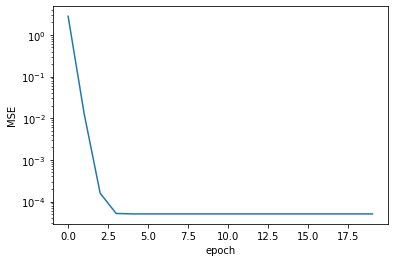

In [126]:
#5.2
w0 = np.array([[0], [0], [0]])

lr = 0.01
mse = []
epoch = np.arange(0, 20, 1)
print(epoch)
for i in range(20):
    sk = np.dot(X, w0)
#     print(sk.shape)
    w0 = w0 + lr * np.dot(Xt, (D - sk))
    
    res = (1/2*(D - sk)*(D - sk)).sum()
    MSE = res / 100
    mse.append(MSE)
    out = "{}{}{}".format(i+1, " epoch,  MSE: ", MSE)
    print(out)
plt.yscale("log")
plt.ylabel("MSE")
plt.xlabel("epoch")
plt.plot(epoch, mse)
 

(100, 1)


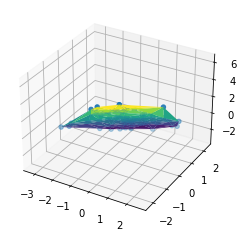

In [116]:
# 5.3(a)
ax = plt.axes(projection='3d')
model_a = np.dot(X, W)
d = np.array([model_a[i] for i in range(len(model_a))])

# Data for three-dimensional scattered points
ax.scatter3D(x1, x2, D)#, cmap='viridis', edgecolor='none')
print(model_a.shape)
ax.plot_trisurf(x1, x2, d[:,0],
                cmap='viridis', edgecolor='none');

(100, 1)


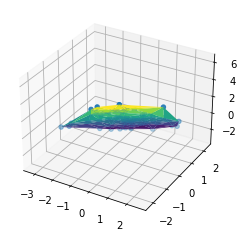

In [127]:
# 5.3(b)
ax2 = plt.axes(projection = '3d')
model_b = np.dot(X, w0)
dim = np.array([model_b[i] for i in range(len(model_b))])

# Data for three-dimensional scattered points
ax2.scatter3D(x1, x2, D)#, cmap='viridis', edgecolor='none')
print(model_b.shape)
ax2.plot_trisurf(x1, x2, dim[:,0],
                cmap='viridis', edgecolor='none');